# Foursquare exploration notebook
## Extracting stats from a dump of foursquare data in the area of Barcelona

In [66]:
# Required imports
import datashader as ds
import pandas as pd
import json
from pprint import pprint

In [67]:
# Importing data
foursquare_categories_dict = {
    "food":0,
    "shops":1,
    "parks_outdoors":2,
    "nightlife":3,
    "travel":4,
    "arts_entertainment":5,
    "building":6,
    "education":7}

with open('../datasets/foursquare/venuesBcn.json') as data_file:    
    data = json.load(data_file)

df = pd.DataFrame([], columns=['category', 'category_id','name', 'lat', 'lng'])    
for i in range (len(data)):
    # print data[i]
    cat = data[i]['categories'][0]['icon']['prefix'].split("/")[5]
    cat_id = foursquare_categories_dict[cat]
    name = data[i]['name']
    lat = data[i]['location']['lat']
    lng = data[i]['location']['lng']
    df.loc[i] = [cat, cat_id, name, lat, lng]

In [68]:
df.head()

category  category_id                 name        lat       lng
0      food          0.0       La Burgueseria  41.467223  2.078569
1      food          0.0          Serrajòrdia  41.468332  2.079303
2      food          0.0  El Cafè de la Mirta  41.468089  2.079680
3  building          6.0              Corner4  41.467342  2.091476
4      food          0.0      Vermuteria Taps  41.468530  2.082778

In [69]:
# Total of venues
df.size

34370

In [70]:
# Plots options
background = "black"
plot_width  = int(900)
plot_height = int(plot_width*7.0/12)

In [71]:
# Trying to visualize the data
import datashader as ds
import datashader.transfer_functions as tf
import holoviews as hv
import geoviews as gv
import holoviews.plotting.mpl
from holoviews.operation.datashader import datashade


/Users/dsolans/anaconda/lib/python2.7/site-packages/datashader/transfer_functions.py:161: DeprecationWarning: `interpolate` is deprecated; use `shade` instead
  warnings.warn(w)


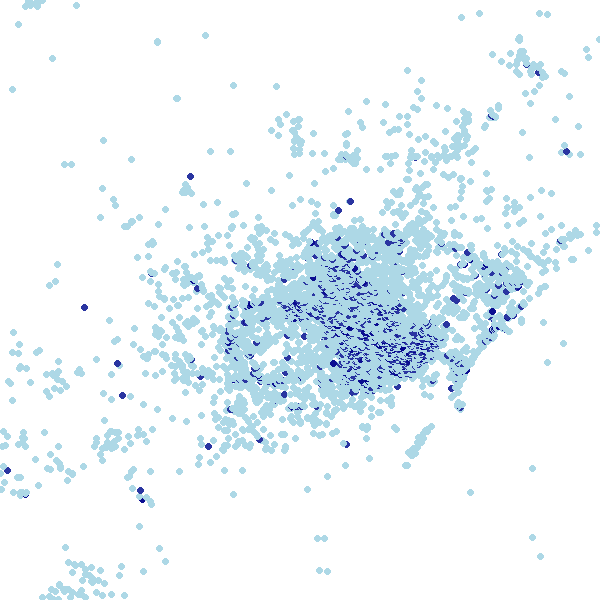

In [72]:
# Creating first datshader
tf.spread(tf.interpolate(ds.Canvas().points(df,'lng', 'lat')), px=3)

In [73]:
# Importing and configuring bokeh
from bokeh.plotting import figure, output_notebook, show

output_notebook()

x_range=(-8250000,-8210000)
y_range=(4965000,4990000)

def base_plot(tools='pan,wheel_zoom,reset',plot_width=900, plot_height=600, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
               x_range=x_range, y_range=y_range, 
               outline_line_color=None,
            min_border=0, min_border_left=0, min_border_right=0,
            min_border_top=0, min_border_bottom=0, **plot_args)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p
    
options = dict(line_color=None, fill_color='blue', size=5)

from IPython.core.display import HTML, display
display(HTML("<style>.container { width:90% !important; }</style>"))

Loading BokehJS ...

In [74]:
# Plotting new datashader of venues. The grid of Eixample is visible!!!
cvs = ds.Canvas(plot_width=800, plot_height=500)
agg = cvs.points(df, 'lng', 'lat')
img = tf.interpolate(agg)

/Users/dsolans/anaconda/lib/python2.7/site-packages/datashader/transfer_functions.py:161: DeprecationWarning: `interpolate` is deprecated; use `shade` instead
  warnings.warn(w)


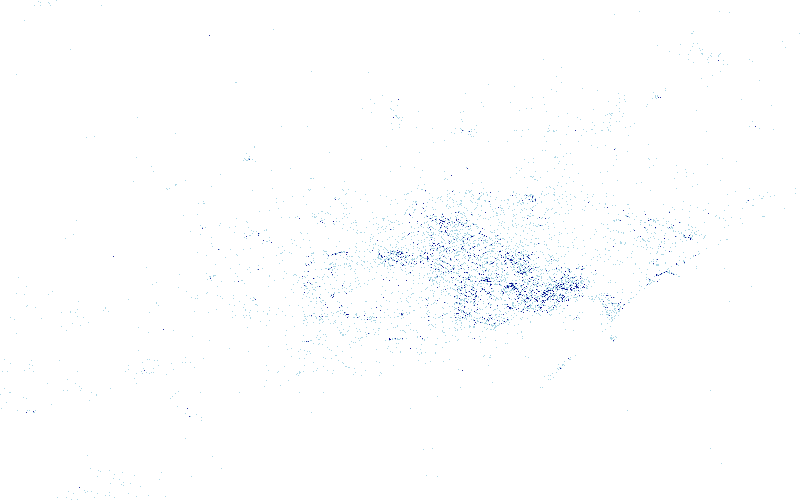

In [75]:
img

In [76]:
# Testing another datashader plot
import datashader as ds
from datashader.bokeh_ext import InteractiveImage
from datashader.colors import Hot

def create_image(x_range, y_range, w, h):
    cvs = ds.Canvas(plot_width=w, plot_height=h, )
    agg = cvs.points(df, 'lng', 'lat')
    img = tf.interpolate(agg, cmap=Hot)
    return tf.dynspread(img, threshold=0.5, max_px=4)

p = base_plot(background_fill_color="black",responsive=True, plot_width=int(900*1.5), plot_height=int(600*1.5))
InteractiveImage(p, create_image)

/Users/dsolans/anaconda/lib/python2.7/site-packages/datashader/transfer_functions.py:161: DeprecationWarning: `interpolate` is deprecated; use `shade` instead
  warnings.warn(w)


In [77]:
# Filtering out venues outside the bounding box of Barcelona. Result stored in df2


#-0,4350, 39,2791, -0,2750, 39,5662
# 39.444855, -0.410510, 39.486869, -0.281764
#-0.407181	39.433541	-0.298691	39.507322
#Barcelona 2.109375,41.3623801295,2.2175216675,41.4200746738
# Eixample 2.1318626404,41.3835063948,2.1873950958,41.4098402048

df2 = pd.DataFrame([], columns=['category', 'category_id','name', 'lat', 'lng'])    
for i in range (len(data)):
    # print data[i]
    cat = data[i]['categories'][0]['icon']['prefix'].split("/")[5]
    cat_id = foursquare_categories_dict[cat]
    name = data[i]['name']
    lat = data[i]['location']['lat']
    lng = data[i]['location']['lng']
    if(lat > 41.3623801295 and lat < 41.4200746738):
         if(lng > 2.1318626404 and lng < 2.1873950958 ):
                df2.loc[i] = [cat, cat_id, name, lat, lng]
                
    


In [ ]:
# Reducing the bounding box, the number of venues is now lower. 
# Some outlayers have been removed!
df2.size

In [ ]:
#Plotting again the filtered data. Still this viz is not the best one

tf.spread(tf.interpolate(ds.Canvas().points(df2,'lng', 'lat')), px=2)

In [ ]:
# Plotting the filtered data
cvs2 = ds.Canvas(plot_width=200, plot_height=125)
agg2 = cvs.points(df2, 'lng', 'lat')
img2 = tf.interpolate(agg2)


In [ ]:
# Thanks to smaller boundaries, the grid now is bigger (but small because the density)
img2

In [ ]:
#Trying to plot points bigger
def create_image(x_range, y_range, w, h):
    cvs = ds.Canvas(plot_width=w, plot_height=h, )
    agg = cvs2.points(df2, 'lng', 'lat')
    img = tf.interpolate(agg2, cmap=Hot)
    return tf.dynspread(img2, threshold=0.5, max_px=4)

p = base_plot(background_fill_color="black",responsive=True, plot_width=int(900*1.5), plot_height=int(600*1.5))
InteractiveImage(p, create_image)

In [ ]:
#Analyzing distribution of venues per neighbourhood
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from functools import partial
import datashader as ds
import datashader.transfer_functions as tf
from datashader.utils import export_image
from datashader.colors import viridis, colormap_select

from colorcet import fire
from IPython.core.display import HTML, display

In [ ]:
#Plotting venues per category
sns.set_style('whitegrid')
%matplotlib inline
cm = partial(colormap_select)

cvs = ds.Canvas(plot_width=600, plot_height=600)
agg = cvs.points(df2, 'lng', 'lat', ds.mean('category_id'))#, ds.mean('z_col'))
img = tf.shade(agg, cmap=cm(fire, 0.25), how='cbrt')

export_image(img,'datashader_total', background='black')


In [ ]:

df2.head()

In [ ]:
#Showing venues now with matplotlib. Looks fine!
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt


x = df2['lng']
y = df2['lat']
labels = df2['category']

dfPlot = pd.DataFrame(dict(x=x, y=y, label=labels))

groupsPlot = dfPlot.groupby('label')

# Plot
plt.figure(figsize=[10,10])
plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)
colors = pd.tools.plotting._get_standard_colors(len(groupsPlot), color_type='random')

fig, ax = plt.subplots(figsize=(15,15))
ax.set_color_cycle(colors)

ax.margins(0.05)
for name, group in groupsPlot:
    ax.plot(group.x, group.y, marker='+', linestyle='', ms=3.5, label=name)
#ax.legend(numpoints=1, loc='upper left')

plt.show()

In [ ]:
#Distribution of categories per neighborhood. points inside BCN vs points outside
print pd.unique(df[['category', 'category_id']].values.ravel())
df.hist(column='category_id')
df2.hist(column='category_id')

In [ ]:
# Given a point, returns the Neighborhood containing it
import json
from shapely.geometry import shape, Point
# depending on your version, use: from shapely.geometry import shape, Point

# load GeoJSON file containing sectors
with open('../datasets/divisiones_administrativas/barris/barris_geo.json') as f:
    barrios = json.load(f)

# construct point based on lon/lat returned by geocoder
point1 = Point(2.170095, 41.387010) #pl catalonia
point2  = Point(2.157412, 41.398908) #home
point3 = Point(2.078568733480877,41.46722302260856) #4s first venue 

# check each polygon to see if it contains the point
for barrio in barrios['features']:
    polygon = shape(barrio['geometry'])
    if polygon.contains(point1):
        print 'Found polygon containing point1 (pl.Catalonia):', barrio['properties'][u'N_Barri']
    elif polygon.contains(point2):
        print 'Found polygon containing point2 (home):', barrio['properties'][u'N_Barri']
    elif polygon.contains(point3):
        print 'Found polygon containing point3 (4s venue):', barrio['properties'][u'N_Barri']


In [ ]:
# Given a point, returns the District containing it
with open('../datasets/divisiones_administrativas/districtes/districtes_geo.json') as f:
     districts = json.load(f)
# construct point based on lon/lat returned by geocoder
point1 = Point(2.170095, 41.387010) #pl catalonia
point2  = Point(2.157412, 41.398908) #home

# check each polygon to see if it contains the point
for distrito in districts['features']:
    polygon = shape(distrito['geometry'])
    if polygon.contains(point1):
        print 'Found polygon containing point1 (pl.Catalonia):', distrito['properties'][u'N_Distri']
    elif polygon.contains(point2):
        print 'Found polygon containing point2 (home):', distrito['properties'][u'N_Distri']


In [ ]:
# Given a point, returns the AEb containing it
with open('../datasets/divisiones_administrativas/area-estadistica/area-estadistica_geo.json') as f:
     aebs = json.load(f)
# construct point based on lon/lat returned by geocoder
point1 = Point(2.170095, 41.387010) #pl catalonia
point2  = Point(2.157412, 41.398908) #home

# check each polygon to see if it contains the point
for aeb in aebs['features']:
    polygon = shape(aeb['geometry'])
    print aeb
    """
    if polygon.contains(point1):
        print 'Found polygon containing point1 (pl.Catalonia):', aeb['properties'][u'N_Distri']
    elif polygon.contains(point2):
        print 'Found polygon containing point2 (home):', distrito['properties'][u'N_Distri']
    """

In [ ]:
#For each row, adds a new field with their neighborhood and district using the functions above
df2["neighborhood"] = ""
df2["district"] = ""
for index, venue in df2.iterrows():
    point = Point(venue.lng, venue.lat)
    for barrio in barrios['features']:
        polygon = shape(barrio['geometry'])
        if polygon.contains(point):
            df2.set_value(index,'neighborhood', barrio['properties'][u'N_Barri'])
    for district in districts['features']:
        polygon = shape(district['geometry'])
        if polygon.contains(point):
            df2.set_value(index,'district',district['properties'][u'N_Distri'])

In [ ]:
# The dataset has the new 2 columns
df2.head()

In [ ]:
# Dumping data to file
out = df.to_json(orient='records')[1:-1].replace('},{', '} {')
with open('venuesBcnLabeled.json', 'w') as f:
    f.write(out)

In [ ]:
# Selecting data by neighborhood on a new DataFrame
barrios_data = {}
for barrio in barrios['features']:
    polygon = shape(barrio['geometry'])
    barrios_data[barrio['properties'][u'N_Barri']] = barrio['properties']

print barrios_data['el Raval']                                                  

In [ ]:
#Printing unique neighborhood and districts
neighborhoods_unique = df2['neighborhood'].unique()
districts_unique =  df2['district'].unique()
print "Neighborhoods: "+str(len(neighborhoods_unique))
print neighborhoods_unique
print "\n"
print "Districts: "+str(len(districts_unique))
print districts_unique
print "\n"

In [ ]:
# Defining function to draw an histogram of venues distribution per zone
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [ ]:
#Drawing histograms for df2
draw_histograms(df2, ['category_id'], 5, 5)

In [ ]:
fig=plt.figure()
for idx, district in enumerate(districts_unique):
    ax=fig.add_subplot(n_rows,n_cols,idx+1)
    df2[df2['district'] == district].hist(column='category_id')
    ax.title("District: "+district)
fig.tight_layout()  # Improves appearance a bit.
plt.show()


In [ ]:
for neighborhood in neighborhoods_unique:
    df2[df2['neighborhood'] == neighborhood].hist(column='category_id')
    plt.title("Neighborhood: "+neighborhood)